In [1]:
from h2_gym.envs import Planning

In [2]:
environment = Planning('NH3-Chile', weather_file ='CoastalChile_15-20_Wind.csv')

with environment as env:
    env['booleans']['vector_choice']['NH3'] = True
    env['booleans']['electrolysers']['SOFC'] = True
    env['booleans']['wind'] = True
    env['equipment']['vector_production']['NH3'] = 5
    env['miscillaneous']['discount_factor'] = 0.06

environment.solve()

[INFO] Reading CSV file: /Users/cameronaldren/miniconda3/envs/h2gym/lib/python3.10/site-packages/meteor_py/data/CoastalChile_15-20_Wind.csv
[INFO] Setup Model completed in 0.08 seconds
[INFO] Model Built in 8.65 seconds
[INFO] Loaded recognised as instance
[INFO] Solved in 4.18 seconds. Status = optimal


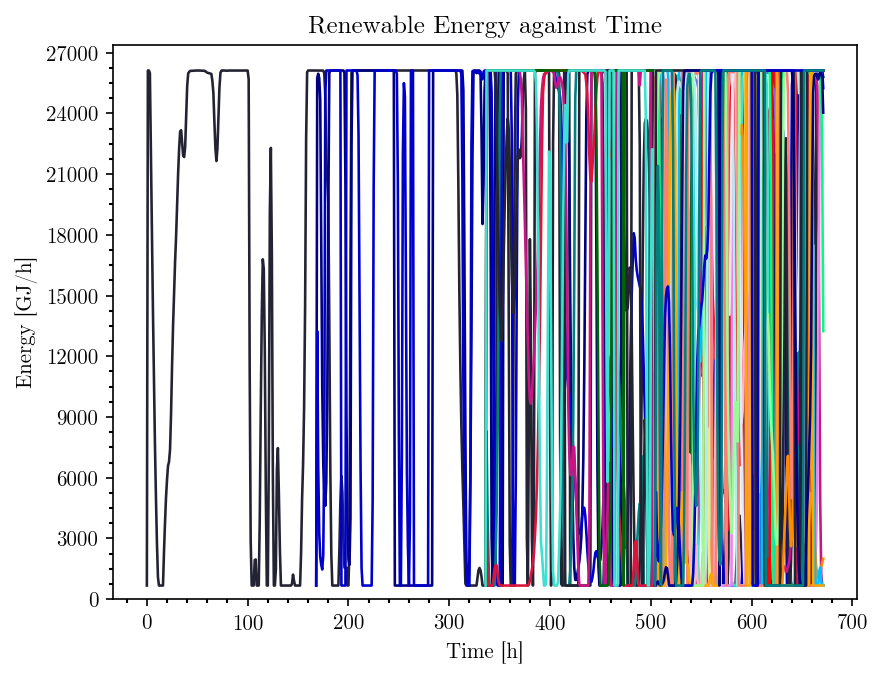

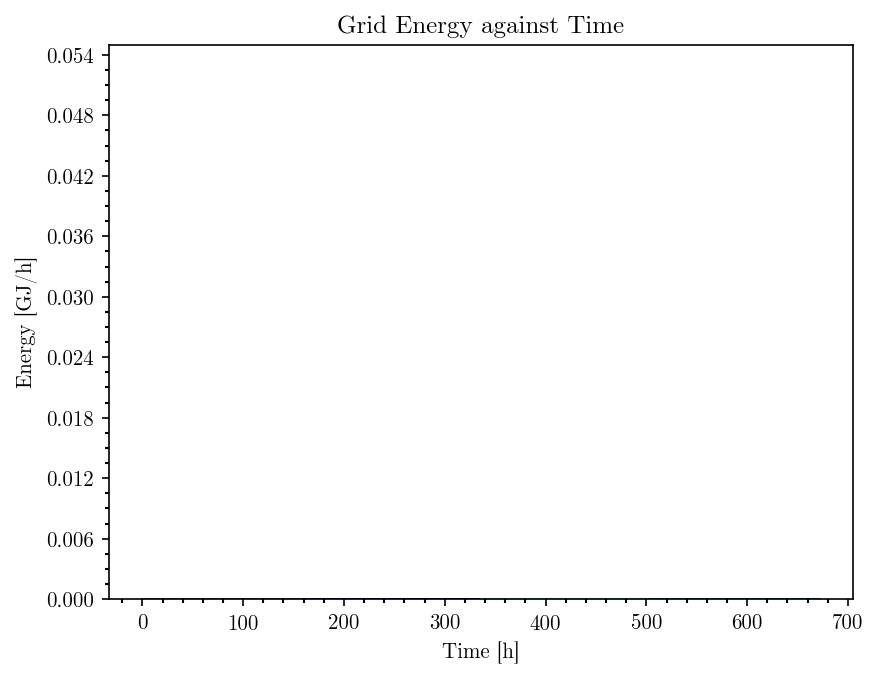

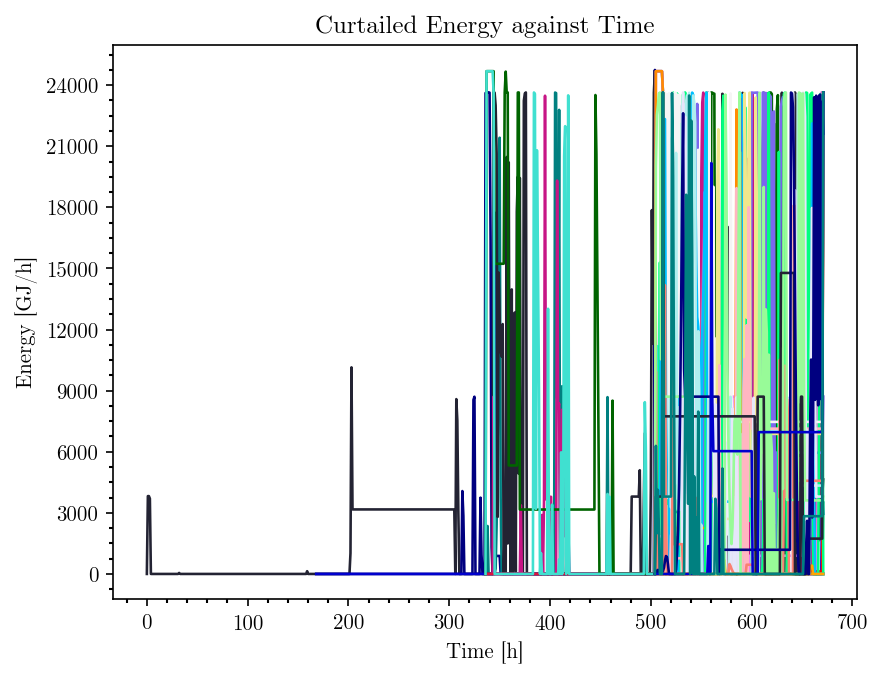

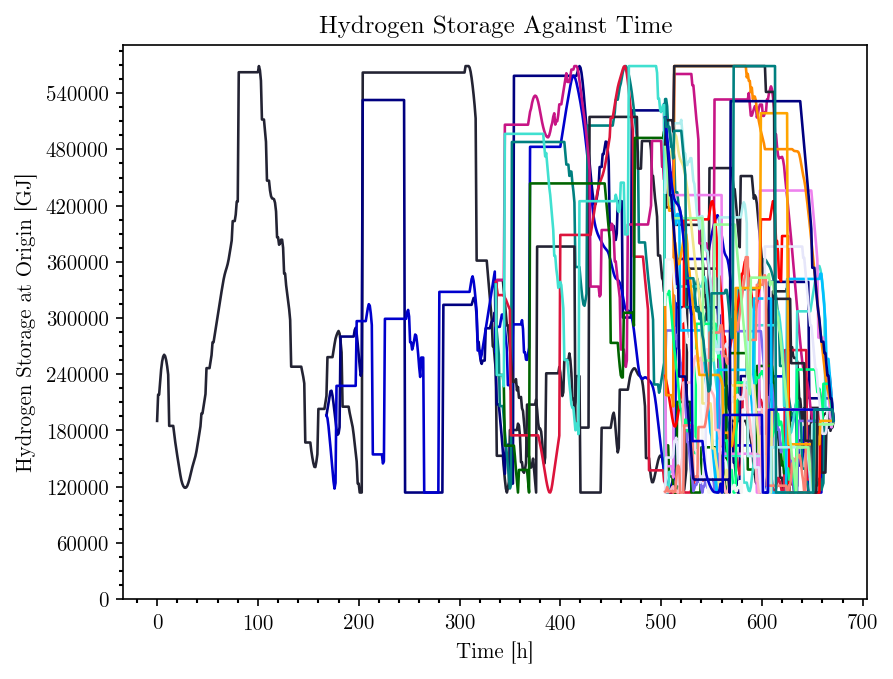

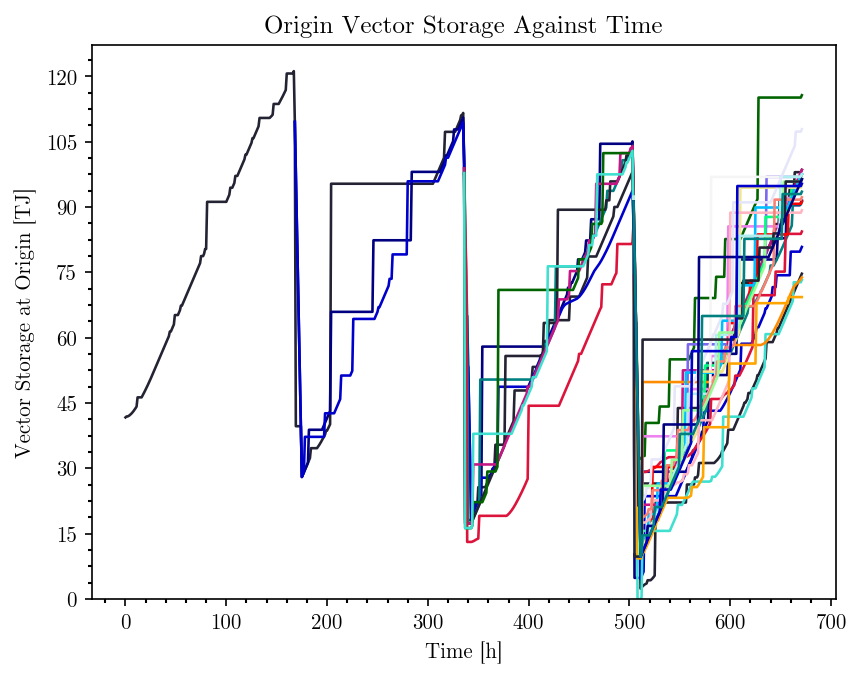

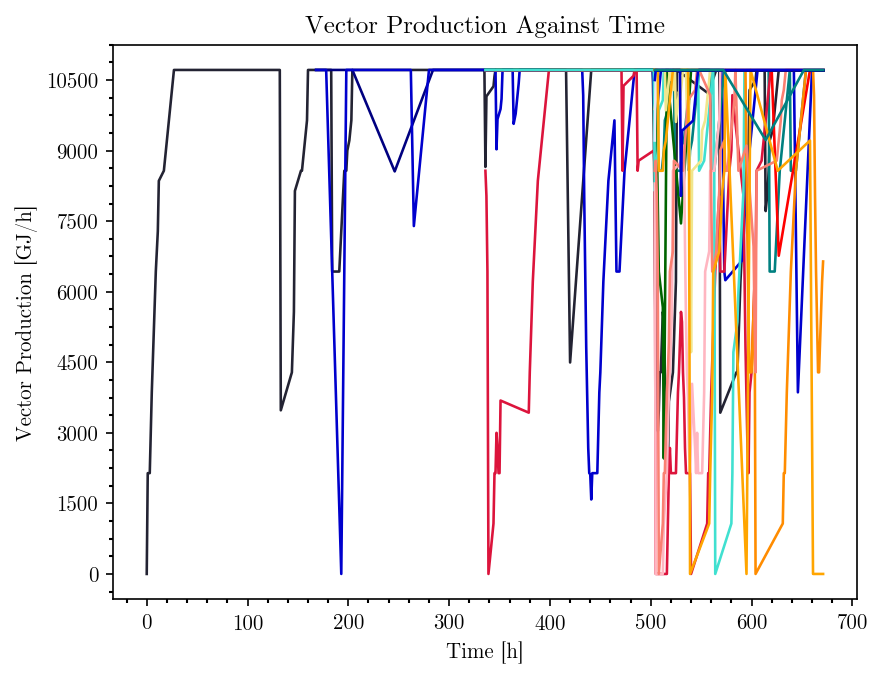

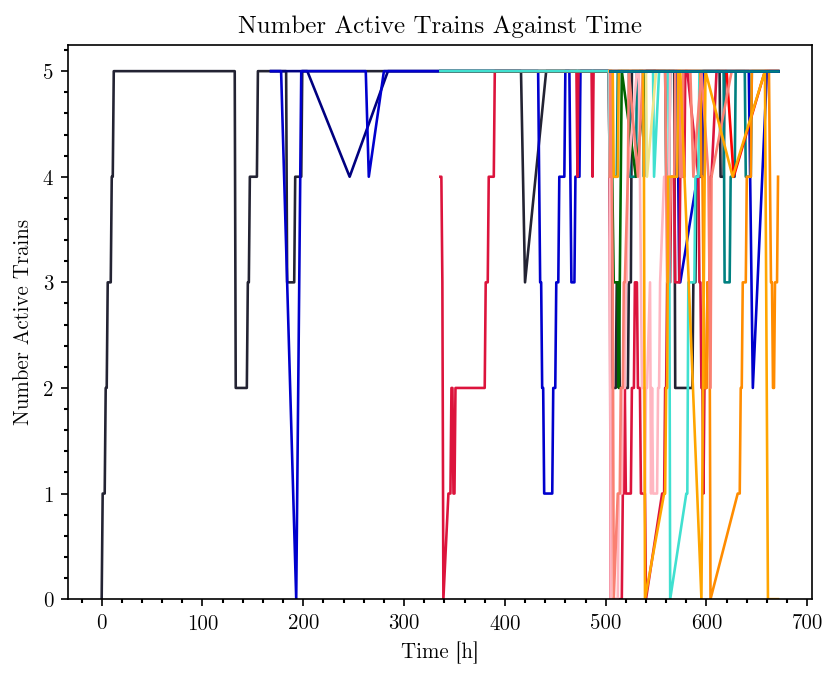

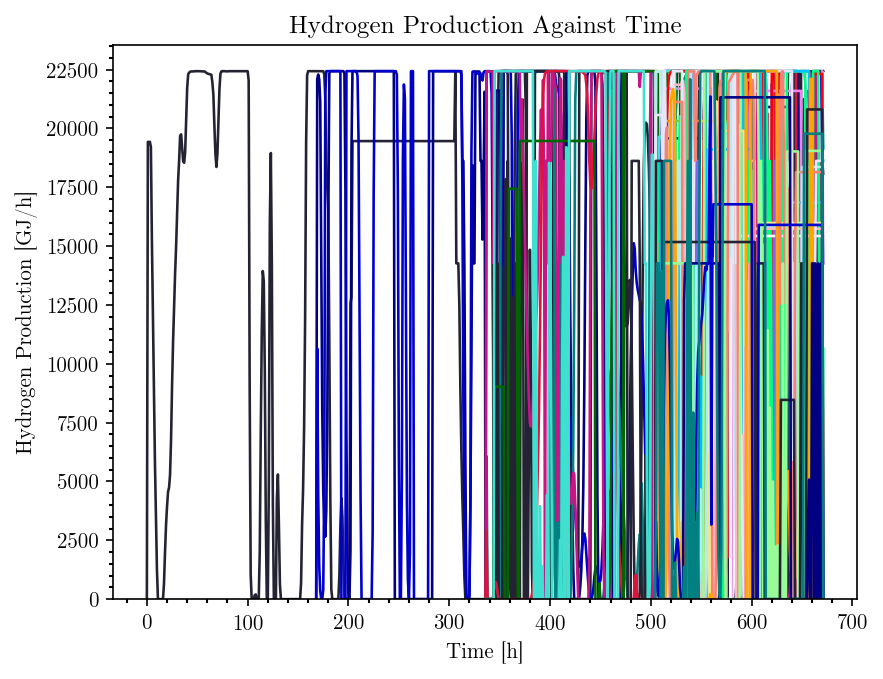

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/cameronaldren/miniconda3/envs/h2gym/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


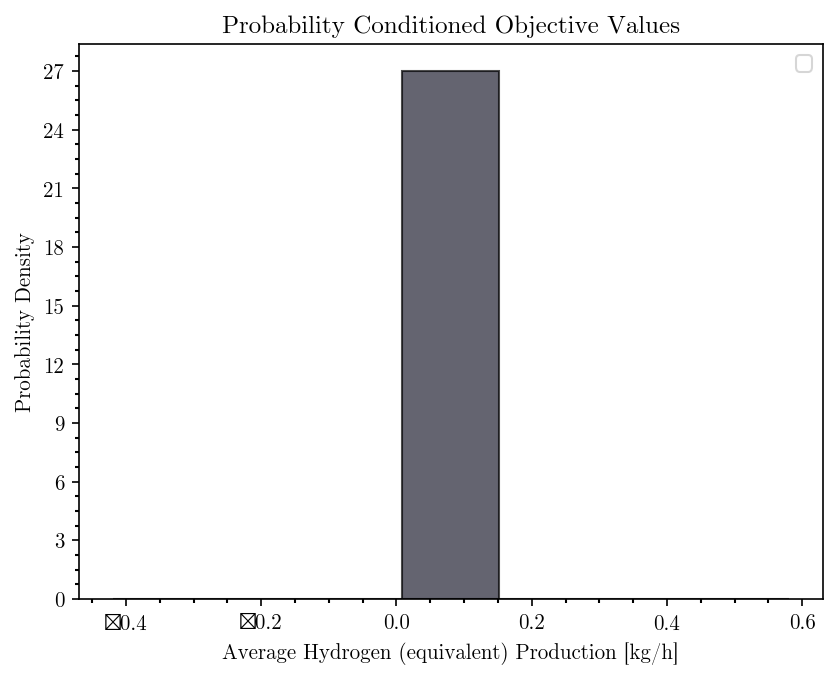

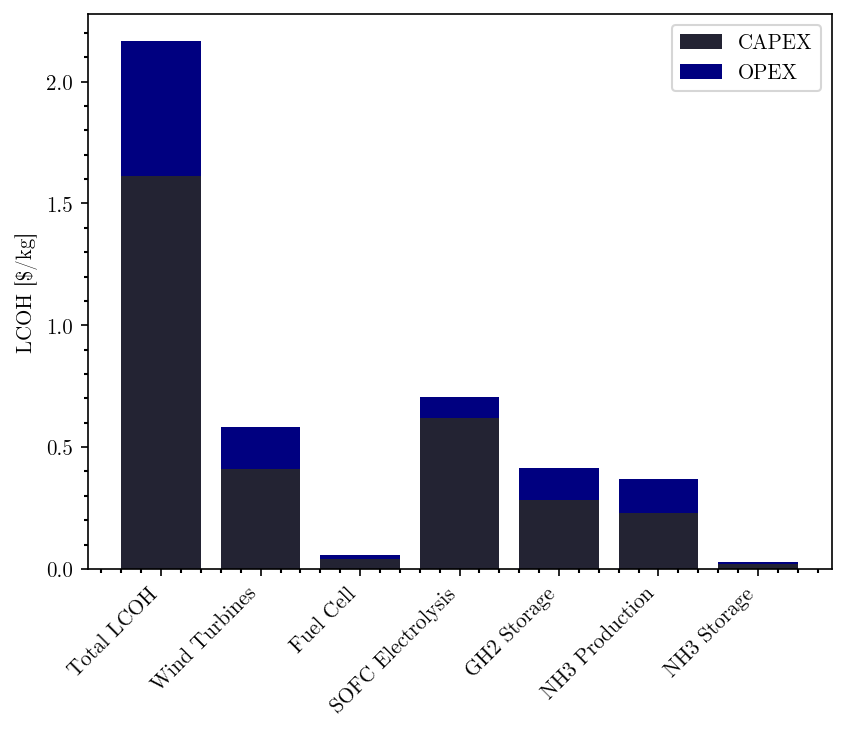

In [3]:
res = environment.get_results()
environment.visualise()

In [4]:
from pyomo.environ import value
sum(value(environment._model.instance.number_ships_start_charging[:,:,:,:]))

112.0